# The Toxic Comments Problem

# **Introduction**

Internet is the new punching bag for some folks where they put out their profanity best and shower all the harsh, offensive and ill-themed words out there for everyone to read. 

This spreads a whole new level of negativity and impacts the people on the other side!

Here is an approach to identity,analyze and eliminate the toxic comments in order to keep the sanity of the medium. 

Credits to Abhilash Majemdar's [notebook](https://www.kaggle.com/colearninglounge/nlp-end-to-end-cll-nlp-workshop) 

Thanks to [Co-learning Lounge](https://www.kaggle.com/colearninglounge) and Yogesh Kothiya.

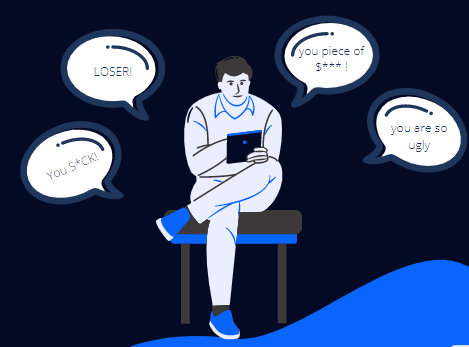

# Steps to arrive at our goal, (will be updated accordingly as we progress)

1. Load Data
2. Understand the data
3. Import Libraries 
4. Statistical Analysis I
5. Statistical Analysis II
6. Cleaning the data
7. Transformation
8. Vectorization and Embeddings
9. Converstion to Binary numbers

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Load the dataset

The problem statement comes wth four csv files, 
* train
* test
* test_labels 
* sample_submission

train is the dataset that will be seen with a microscope to establish what the data is, the balance in the data, toxicity distribution, etc. Exploring the data will set us in a path to pin point the pain point!

Later, the train data is enhanced and analyzed to get a model.

Once we have the model ready, we treat the same on the test data to ensure we have achieved our goal!

Lets bring the real food(data) to the table!

In [ ]:
# Read train.csv into dataframe train
train = pd.read_csv('../input/jigsaw-toxic-comment-classification-challenge/train.csv.zip')

In [ ]:
# Print first 5 rows of the df
train.head()

In [ ]:
# Get the Data statistics
print("Number of rows:",train.shape[0])
print("Number of columns:",train.shape[1])
print("Column Names:",train.columns.values.tolist())

In [ ]:
# Check if data has any null values
print("Columns with Null Values:",train.isnull().any())

In [ ]:
# Check if data has any missing values
print("Columns with Missing Values:",train.columns[train.isnull().any()].tolist())

# **Data Overview:**
      
Now that we have seen how the data looks, Here is a high level overview of the data. The dataset has comments that are rated for toxicity. 

The comments are tagged in the following categories, 
* toxic
* severe_toxic
* obscene
* threat 
* insult
* identity_hate

We also know, 
* 0 says the comment is not offensive and 1 says the comment is offensive
* We have 159571 records in the training set
* the are no nulls or missing values in the dataset 

Does this mean we have a clean dataset? Let's find out in the following sections!

# Import Libraries

In order to get deeper into the data, we need libraries that enable us with various functionalities to make it easier for us.



In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing,metrics,manifold
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_val_predict
from imblearn.over_sampling import ADASYN,SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import collections
import matplotlib.patches as mpatches
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.preprocessing import RobustScaler
import xgboost
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,r2_score,recall_score,confusion_matrix,precision_recall_curve
from collections import Counter
from sklearn.model_selection import StratifiedKFold,KFold,StratifiedShuffleSplit
from nltk import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD,SparsePCA
from sklearn.metrics import classification_report,confusion_matrix
from nltk.tokenize import word_tokenize
from collections import defaultdict
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk.corpus import stopwords
import string
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Statistical Analysis I

Its time for us to look at the data more closely. Lets see some numbers and graphs to know more!

In [ ]:
# Get Toxic Comments
toxic_comments=train[train['toxic']==1]['comment_text']
# Get Severe Toxic Comments
severetoxic_comments=train[train['severe_toxic']==1]['comment_text']
# Get Obscene Comments
obscene_comments=train[train['obscene']==1]['comment_text']
# Get Threat Comments
threat_comments=train[train['threat']==1]['comment_text']
# Get Insult Comments
insult_comments=train[train['insult']==1]['comment_text']
# Get Identity Hate Comments
identityhate_comments=train[train['identity_hate']==1]['comment_text']

**Sample data of all the categories of toxicity**

In [ ]:
print("TOXIC COMMENTS:\n".format(),toxic_comments[:5])
print("\nSEVERE TOXIC COMMENTS:\n".format(),severetoxic_comments[:5])
print("\nOBSCENE COMMENTS:\n".format(),obscene_comments[:5])
print("\nTHREAT COMMENTS:\n".format(),threat_comments[:5])
print("\nINSULT COMMENTS:\n".format(),insult_comments[:5])
print("\nIDENTITY HATE COMMENTS:\n".format(),identityhate_comments[:5])

Let us know see how many clean(0) and offensive(1) comments are available in each category of toxicity

In [ ]:
# Toxicity category columns
label_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
# Assigned to count all clean comments
value_counts_0 = []
# Assigned to count all offensive comments
value_counts_1 = []

for col in label_columns:
  value_counts_0.append(train[col].value_counts()[0])
  value_counts_1.append(train[col].value_counts()[1])

print("Number of clean comments:",value_counts_0)
print("Number of offensive comments:",value_counts_1)

In [ ]:
def plot_toxicity(labels,count,ylabel,xlabel,subtitle):
    fig = plt.figure(figsize = (10, 5)) 

    # creating the bar plot 
    plt.bar(labels,count, color=['#422680','#341671','#280659','#660F56','#AE2D67','#F54952'],  width = 0.5) 

    plt.xlabel(xlabel,fontweight ='bold',fontname='Monsterrat') 
    plt.ylabel(ylabel,fontweight ='bold',fontname='Monsterrat') 
    plt.title(subtitle,fontweight ='bold',fontname='Comic Sans MS') 

    for x,y in zip(labels,count):

        label = "{:}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,3), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or c
    
    plt.show() 

plot_toxicity(label_columns,value_counts_0,"No. of occurences","Type of toxicity","Clean Comments")
plot_toxicity(label_columns,value_counts_1,"No. of occurences","Type of toxicity","Toxicity Distribution")

In [ ]:
#Heat map to show the correlation
temp_df=train.iloc[:,2:]
corr=temp_df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

It is seen from the heat map above that a comment can fall into multiple categories. For example, it can be just toxic or/and obscene. 

In [ ]:
# Example of comments that are toxic and obscene
toxicnobscene_comments=train[(train['toxic']==1) & train['obscene']==1]['comment_text']
print("TOXIC AND OBSCENE COMMENTS:\n".format(),toxicnobscene_comments[:5])


In [ ]:
# Example of comments that are toxic and severe_toxic
toxicnsevere_comments=train[(train['toxic']==1) & train['severe_toxic']==1]['comment_text']
print("TOXIC AND SEVERE TOXIC COMMENTS:\n".format(),toxicnsevere_comments[:5])

In [ ]:
# Example of comments that fall under all catgeories
allcat_comments=train[(train['toxic']==1) 
                    & (train['severe_toxic']==1)
                    & (train['obscene']==1)
                    & (train['threat']==1)
                    & (train['insult']==1)
                    & (train['identity_hate']==1)]['comment_text']
print("Comments in all categories:\n".format(),allcat_comments[:5])
print("\nCount of comments in all categories:",allcat_comments.count())

# Another way to look at the data is by marking all clean comments and offensive comments. The comments with any of the label columns as 1 will be tagged as offensive and the rows with all 0 will be marked clean. 

P.S: Now, let us not get confused with "clean data" and "clean comments" :)  Well, clean comments are comments with no toxicity and clean data is what we get after cleaning the whole data for punctuations, stop words, etc! 

In [ ]:
# Summing up all the counts for toxic columns
x=train.iloc[:,2:].sum()
# Calculate sum of rows
rowsums=train.iloc[:,2:].sum(axis=1)
# marking comments without any tags as "clean"
# creates a new column with bool value marking as clean or offensive
train['clean']=(rowsums==0)
#count number of clean entries
train['clean'].sum()

print("Total comments:",len(train))
print("Total clean comments:",train['clean'].sum())
print("Total offensive comments:",x.sum())

In [ ]:
train.head()

In [ ]:
# Count of all clean comments
count_clean=train[train['clean']==True]
# Count of all offensive comments
count_offensive=train[train['clean']==False]

# Word Length in each segment

In [ ]:
#Analyse the count of words in each segment
#Function for checking word length
def cal_len(data):
    return len(data)

#Create generic plotter with Seaborn
def plot_count(count_ones,count_zeros,title_1,title_2,subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.distplot(count_zeros,ax=ax1,color='#422680')
    ax1.set_title(title_1)
    sns.distplot(count_ones,ax=ax2,color='#F54952')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()    


count_clean_words=count_clean['comment_text'].str.split().apply(lambda z:cal_len(z))
count_offensive_words=count_offensive['comment_text'].str.split().apply(lambda z:cal_len(z))
print("Clean Words:" + str(count_clean_words))
print("Offensive Words:" + str(count_offensive_words))
plot_count(count_clean_words,count_offensive_words,"Clean Words","Offensive words","Comments Word Analysis")

# Count punctuations 

In [ ]:
#Count Punctuations/Stopwords/Codes and other semantic datatypes
#We will be using the "generic_plotter" function.

count_clean_punctuations=count_clean['comment_text'].apply(lambda z: len([c for c in str(z) if c in string.punctuation]))
count_offensive_punctuations=count_offensive['comment_text'].apply(lambda z:len([c for c in str(z) if c in string.punctuation]))
plot_count(count_clean_punctuations,count_offensive_punctuations,"Clean Comments Punctuations","Offensive Comments Punctuations","Comments Word Punctuation Analysis")

# Stopwords analysis

In [ ]:
#Analyse Stopwords

def plot_count_1(count_ones,count_zeros,title_1,title_2,subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.distplot(count_zeros,ax=ax1,color='#422680')
    ax1.set_title(title_1)
    sns.distplot(count_ones,ax=ax2,color='#F54952')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()    


stops=set(stopwords.words('english'))
count_clean_stops=count_clean['comment_text'].apply(lambda z : np.mean([len(z) for w in str(z).split()]))
count_offensive_stops=count_offensive['comment_text'].apply(lambda z : np.mean([len(z) for w in str(z).split()]))
plot_count_1(count_clean_stops,count_offensive_stops,"Clean Comments Stopwords","Offensive Comments Stopwords","Comments Stopwords Analysis")

# Check for URLs

In [ ]:
## Checking number of Urls
count_clean_urls=count_clean['comment_text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
count_offensive_urls=count_offensive['comment_text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

plot_count_1(count_clean_stops,count_offensive_stops,"Clean Comments URLs","Offensive Comments URLs","Comments URLs Analysis")

# Wordcloud

In [ ]:
#WordCloud Visualizations
#Method for creating wordclouds
from PIL import Image
def display_cloud(data,label):
    plt.subplots(figsize=(10,10))
    text = data[data[label]==1]["comment_text"].tolist()
    wc = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=1800,
                          height=800,
                         )
    wc.generate(' '.join(text))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.title(label,fontsize=36)
    plt.show()
    


In [ ]:
display_cloud(train,"toxic")

In [ ]:
display_cloud(train,"severe_toxic")

In [ ]:
display_cloud(train,"obscene")

In [ ]:
display_cloud(train,"threat")

In [ ]:
display_cloud(train,"insult")

In [ ]:
display_cloud(train,"identity_hate")

# Counter

In [ ]:
#Simplified counter function
def create_corpus(word):
    corpus=[]
    
    for x in train[train['clean']==word]['comment_text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

def plotword(corpus):
    counter=Counter(corpus)
    most=counter.most_common()
    x=[]
    y=[]
    for word,count in most[:50]:
        if (word not in stops) :
            x.append(word)
            y.append(count)
    return sns.barplot(x=y,y=x,palette="rocket")

In [ ]:
# Top words for offensive comments
corpus=create_corpus(False)
plotword(corpus)


In [ ]:
# Top words for clean comments
corpus=create_corpus(True)
plotword(corpus)

# **Inference From Analysis -I**

The following can be inferred from the data:

* The dataset is not balanced with respect to clean and offensive comments.
* There are more clean comments in comparison with offensive comments
* The length of comments has no influence on whether it is offensive or not!
* The dataset contains redundant words and html syntaxes.
* Punctuations/stopwords are more in clean comments in comparison with offensive comments

The above analysis could also be done on toxic columns. The goal here is to understand the presence of data that needs to be cleaned. Same goes with the further analysis.


# Gram Statistic

Grams analysis is crucial to undersatnd what is the context, the neighbors of the word and how that can be leverged to see what needs to emitted and what needs to be transformed.


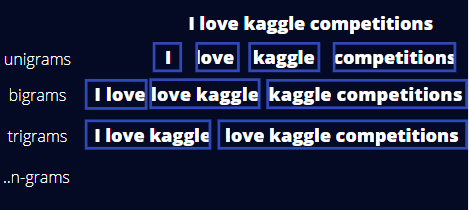

In [ ]:
#Gram analysis on Training set- Bigram and Trigram
stopword=set(stopwords.words('english'))
def gram_analysis(data,gram):
    tokens=[t for t in data.lower().split(" ") if t!="" if t not in stopword]
    ngrams=zip(*[tokens[i:] for i in range(gram)])
    final_tokens=[" ".join(z) for z in ngrams]
    return final_tokens


#Create frequency grams for analysis
    
def create_dict(data,grams):
    freq_dict=defaultdict(int)
    for sentence in data:
        for tokens in gram_analysis(sentence,grams):
            #print(len(tokens))
            if (len(tokens) <=30):
                freq_dict[tokens]+=1
    return freq_dict

# Horizontal bar chart
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["n_gram_words"].values[::-1],
        x=df["n_gram_frequency"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace



def create_new_df(freq_dict,):
    freq_df=pd.DataFrame(sorted(freq_dict.items(),key=lambda z:z[1])[::-1])
    freq_df.columns=['n_gram_words','n_gram_frequency']
    #print(freq_df.head())
    #plt.barh(freq_df['n_gram_words'][:20],freq_df['n_gram_frequency'][:20],linewidth=0.3)
    #plt.show()
    trace=horizontal_bar_chart(freq_df[:20],'#660F56')
    return trace
    
def plot_grams(trace_zero,trace_one):
    fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of clean comments", 
                                          "Frequent words of offensive comments"])
    fig.append_trace(trace_zero, 1, 1)
    fig.append_trace(trace_ones, 1, 2)
    fig['layout'].update(height=1200, width=900, title="Word Count Plots")
    py.iplot(fig, filename='word-plots')
    
    
train_df_zero=count_clean['comment_text']
train_df_ones=count_offensive['comment_text']


In [ ]:
#print("Bi-gram analysis")
freq_train_df_zero=create_dict(train_df_zero[:200],2)
#print(freq_train_df_zero)
trace_zero=create_new_df(freq_train_df_zero)
freq_train_df_ones=create_dict(train_df_ones[:200],2)
#print(freq_train_df_zero)
trace_ones=create_new_df(freq_train_df_ones)
plot_grams(trace_zero,trace_ones)


In [ ]:
#print("Tri-gram analysis")
freq_train_df_zero=create_dict(train_df_zero[:200],3)
#print(freq_train_df_zero)
trace_zero=create_new_df(freq_train_df_zero)
freq_train_df_ones=create_dict(train_df_ones[:200],3)
#print(freq_train_df_zero)
trace_ones=create_new_df(freq_train_df_ones)
plot_grams(trace_zero,trace_ones)

# Inference from Analysis - II

The gram analysis typically shows the bag of words that are together and the frequency. 

Also shows some cleaning is required in terms of punctuations and characters.

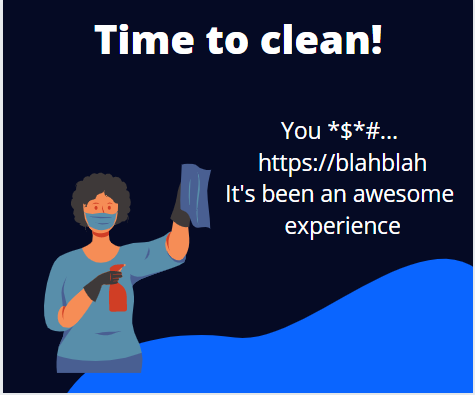

# Data Cleaning

Finaly, we arrive at cleaning the data.

This process would involve, 
* Removing puctuations 
* Removing HTML tags
* Removing URL data
* Removing emojis
* Removing Abbrevations


In [ ]:
%%time
import re
def remove_punctuations(data):
    punct_tag=re.compile(r'[\.,!?;:]+')
    data=punct_tag.sub(r'',data)
    return data

#Removes HTML syntaxes
def remove_html(data):
    html_tag=re.compile(r'<.*?>')
    data=html_tag.sub(r'',data)
    return data

#Removes URL data
def remove_url(data):
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

#Removes Emojis
def remove_emoji(data):
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    data=emoji_clean.sub(r'',data)
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

train['comment_text']=train['comment_text'].apply(lambda z: remove_punctuations(z))
train['comment_text']=train['comment_text'].apply(lambda z: remove_html(z))
train['comment_text']=train['comment_text'].apply(lambda z: remove_url(z))
train['comment_text']=train['comment_text'].apply(lambda z: remove_emoji(z))

In [ ]:
def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data)  
    return data


train['comment_text']=train['comment_text'].apply(lambda z: remove_abb(z))

In [ ]:
# Count of clean and offensive comments
count_good=train[train['clean']==True]
count_bad=train[train['clean']==False]

In [ ]:
#Apply Gram Analysis
train_df_zero=count_bad['comment_text']
train_df_ones=count_good['comment_text']

print(train_df_zero)


In [ ]:
print("Tri-gram analysis")
freq_train_df_zero=create_dict(train_df_zero[:200],3)
#print(freq_train_df_zero)
trace_zero=create_new_df(freq_train_df_zero)
freq_train_df_ones=create_dict(train_df_ones[:200],3)
#print(freq_train_df_zero)
trace_ones=create_new_df(freq_train_df_ones)
plot_grams(trace_zero,trace_ones)

In [ ]:
display_cloud(train,"toxic")

In [ ]:
display_cloud(train,"severe_toxic")

In [ ]:
display_cloud(train,"obscene")

In [ ]:
display_cloud(train,"threat")


In [ ]:
display_cloud(train,"insult")

In [ ]:
display_cloud(train,"identity_hate")

The most important phase is now done! Cleaning and Preprocessing of data is the most crucial step. If unclean data is used for further analysis, the expected result would be far from reality. 


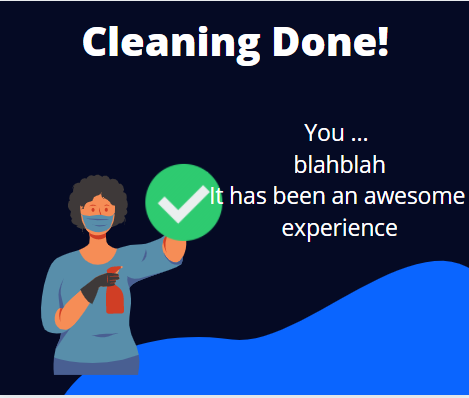

# Transforming Data

Now that we have cleaned the data, there could be some transformations applied to the data to knock off some redundencies. 
Lemmatization is used in order to get the root word of words. Stemming takes a back seat here as it simply cuts the word to a meaning word.

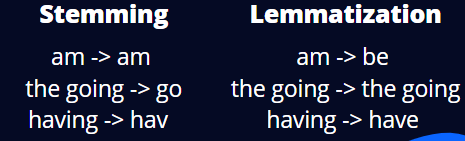

In [ ]:
%%time
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

def lemma_traincorpus(text):
    lemm_words = " ".join([lemm.lemmatize(word) for word in text.split()])    
    return lemm_words
                        


train['comment_text']=train['comment_text'].apply(lambda z: lemma_traincorpus(z))

In [ ]:
#check a sample from the lemmatized dataset
train['comment_text'][5:10]

In [ ]:
#pd.set_option('display.max_colwidth', None)

In [ ]:
#print(train[train['id']== '001e89eb3f0b0915']['comment_text'])

# This marks the end of Data Preparation!

# Vectorization

This is to convert our text data to the world of numbers so that the machine can better understand. 

Vectorization deals with non-sematic analysis,
* Count Vectorization
* TF-IDF


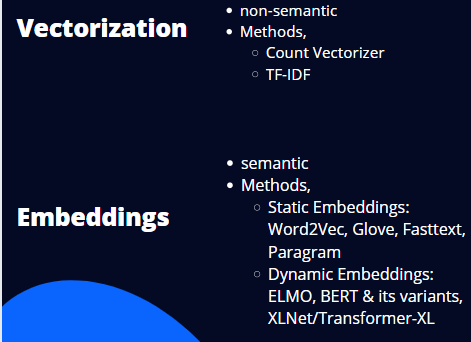

In [ ]:
%%time
tfidf_vect=TfidfVectorizer(stop_words='english',ngram_range=(1,3))
train_tfidf=tfidf_vect.fit_transform(train['comment_text'].values.tolist())
train_tfidf.shape

In [ ]:
## Outputs from the TF-IDF transformed data
print(train_tfidf)

# Converting the data to Binary numbers

In [ ]:
%%time
train_li=[]
for i in range(len(train)):
    if (train['clean'][i]==False):
        train_li.append(1)
    else:
        train_li.append(0)
train['Binary']=train_li
train.head()

# Visualization of Vectors

Though human eye is super powerful, there is only 2 and 3 dimension that can be perceived well and understood. A dataset can be recognised with n number of measures or dimensions. Making sense of each one visually is unimaginable. Hence, Reduction comes into picture! Resons why we need reduction is listed below. 

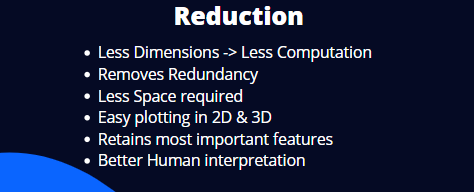

To help us achieve dimensionality reduction, useful and powerful techniques are available,
* PCA – Principal Component Analysis – technique uses Eigen vectors to find the small matrices
* SVD – Singular Value Decomposition – Linear dimensionality reduction technique usually on Sparse matrices 
* TSNE – t-distributed Stochastic Neighbor Embedding – technique that uses non-convex optimization along with gradient descent and minimizes the distance between datapoints.

It is advised to use PCA for Dense Data and SVD for Sparse data. TSNE is limited in usage as it takes more memory and time.


In [ ]:
#Count Vectorization
import matplotlib
import matplotlib.pyplot as plt
def vectorize(data):
    cv=CountVectorizer()
    fit_data_cv=cv.fit_transform(data)
    return fit_data_cv,cv


In [ ]:
#Tfidf vectorization from sklearn
def tfidf(data):
    tfidfv=TfidfVectorizer()
    fit_data_tfidf=tfidfv.fit_transform(data)
    return fit_data_tfidf,tfidfv

In [ ]:
def dimen_reduc_plot(test_data,test_label,option):
    tsvd= TruncatedSVD(n_components=2,algorithm="randomized",random_state=42)
    tsne=TSNE(n_components=2,random_state=42) #not recommended instead use PCA
    pca=SparsePCA(n_components=2,random_state=42)
    if(option==1):
        tsvd_result=tsvd.fit_transform(test_data)
        plt.figure(figsize=(10,8))
        colors=['#422680','#F54952']
        sns.scatterplot(x=tsvd_result[:,0],y=tsvd_result[:,1],hue=test_label)       
        plt.show()
        plt.figure(figsize=(10,10))
        plt.scatter(tsvd_result[:,0],tsvd_result[:,1],c=test_label,cmap=matplotlib.colors.ListedColormap(colors))
        color_red=mpatches.Patch(color='#F54952',label='Offensive Comment')
        color_orange=mpatches.Patch(color='#422680',label='Clean Comment')
        plt.legend(handles=[color_orange,color_red])
        plt.title("TSVD")
        plt.show()
    if(option==2):
        tsne_result=tsne.fit_transform(test_data)
        plt.figure(figsize=(10,8))
        colors=['#422680','#F54952']
        sns.scatterplot(x=tsne_result[:,0],y=tsne_result[:,1],hue=test_label)
        plt.show()
        plt.figure(figsize=(10,10))
        plt.scatter(x=tsne_result[:,0],y=tsne_result[:,1],c=test_label,cmap=matplotlib.colors.ListedColormap(colors))
        color_red=mpatches.Patch(color='#F54952',label='Offensive Comment')
        color_orange=mpatches.Patch(color='#422680',label='Clean Comment')
        plt.legend(handles=[color_orange,color_red])
        plt.title("TSNE")
        plt.show() 
    if(option==3):
        pca_result=pca.fit_transform(test_data.toarray())
        plt.figure(figsize=(10,8))
        colors=['#422680','#F54952']
        sns.scatterplot(x=pca_result[:,0],y=pca_result[:,1],hue=test_label)
        plt.show()
        plt.figure(figsize=(10,10))
        plt.scatter(x=pca_result[:,0],y=pca_result[:,1],c=test_label,cmap=matplotlib.colors.ListedColormap(colors))
        color_red=mpatches.Patch(color='#F54952',label='Offensive Comment')
        color_orange=mpatches.Patch(color='#422680',label='Clean Comment')
        plt.legend(handles=[color_orange,color_red])
        plt.title("PCA")
        plt.show()


In [ ]:
train_data=train       
data_vect=train_data['comment_text'].values
data_vect_good=count_good['comment_text'].values
target_vect=train_data['Binary'].values
target_data_vect_good=train[train['clean']==True]['Binary'].values
data_vect_bad=count_bad['comment_text'].values
target_data_vect_bad=train[train['clean']==False]['Binary'].values
train_data_cv,cv= vectorize(data_vect)
real_review_train_data_cv,cv=vectorize(data_vect_good)
false_review_train_data_cv,cv=vectorize(data_vect_bad)

In [ ]:
dimen_reduc_plot(train_data_cv,target_vect,1)

In [ ]:
dimen_reduc_plot(real_review_train_data_cv,target_data_vect_good,1)

In [ ]:
dimen_reduc_plot(false_review_train_data_cv,target_data_vect_bad,1)

In [ ]:
# using TFIDF
train_data_cv,cv= tfidf(data_vect)

In [ ]:
dimen_reduc_plot(train_data_cv,target_vect,1)

In [ ]:
#TSNE visualization on first 1000 samples
train_data=train[:1000]       
data_vect=train_data['comment_text'].values
data_vect_good=count_good['comment_text'].values
target_vect=train_data['Binary'].values
target_data_vect_good=train[train['clean']==True]['Binary'].values
data_vect_bad=count_bad['comment_text'].values
target_data_vect_bad=train[train['clean']==False]['Binary'].values
train_data_cv,cv= vectorize(data_vect)
real_review_train_data_cv,cv=vectorize(data_vect_good)
dimen_reduc_plot(train_data_cv,target_vect,3)

# Semantic Embeddings

'Semantic' means meaning/related to. And our context here is to look at words that are similar. To enable the machine to capture words with their meaning like we humans do. Hence, we look at embeddings that are semantic and that can be static or dynamic embeddings. 

Word Embeddings: These are vector space transformations of the words present in the corpus. When converted to vectors, several metrics can be applied like finding similarity, distance measurement between the vectors, numerical transforms of the vectors. With word vectors, we can specify semantic similarity between different words or collection of words.

# Static Word Embeddings

Unsupervised technique with supervised tasks, takes a corpus of words and produces word embeddings as output. 


# Word2Vec Methodology

Transforming words with its context to vectors that the machine can understand has two steps,
1. Mapping of a high dimensional one-hot style representation of words to a lower dimensional vector.
2. Mainting the meaning and context.

Two different architectures/approaches to achieve this are,

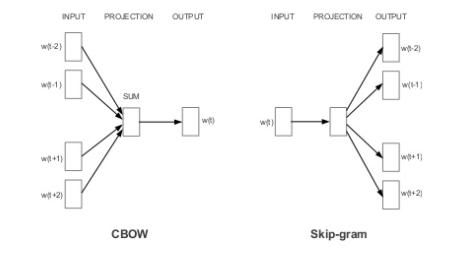

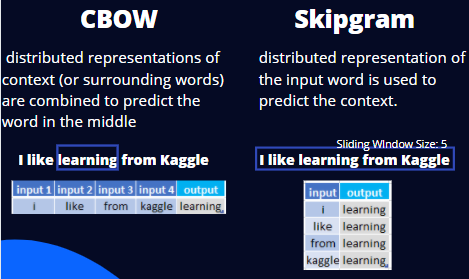


[Jay](http://jalammar.github.io/illustrated-word2vec/)'s blog is a great resource!

Co learning Lounge's youtube [video](https://www.youtube.com/watch?v=UTknlpS1bFU&t=334s) by Abhilash is of great help!

There is yet two ways to do this, 

1) **Softmax function**: This includes the following steps,
* Build vocabulary from training documents.
* Represent the word as one-hot vector or encoding technique as Huffman 
* Calculate the probability distribution of the input word
* Get the log likelihood of the words
* Derive the hidden layer weight matrix
* Output layer will be a softmax regression classifier which produces output between 0 and 1


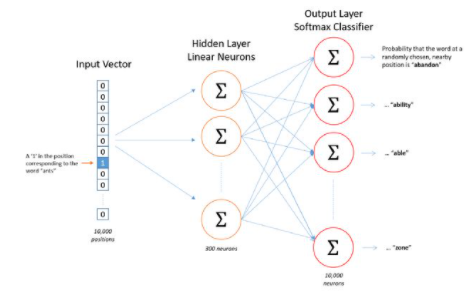

2) With Negative Sampling: This includes the follwing steps,

* An (integer) input of a target word and a real or negative context word
* An embedding layer lookup (i.e. looking up the integer index of the word in the embedding matrix to get the word vector)
* The application of a dot product operation
* The output sigmoid layer scale of 0 and 1
* Find error = target - sigmoid_scores
* Update model parameters and train

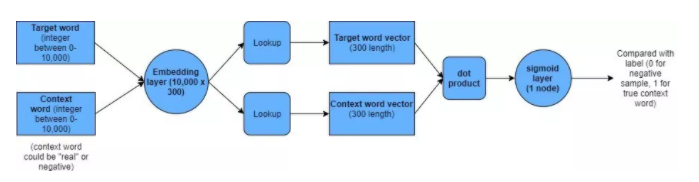

In [ ]:
check_df=list(train['comment_text'].str.split())

In [ ]:
%%time
## Load word2vec algorithm from gensim
from gensim.models import Word2Vec,KeyedVectors

model=Word2Vec(check_df,min_count=1)
word_li=list(model.wv.vocab)


In [ ]:
print(model)
print(model['edits'])

In [ ]:
#View the Embedding Word Vector
plt.plot(model['edits'])
plt.show()

The above plot shows the vectors of each word with the word "edits".

In [ ]:
##save the modeled words produced from Word2Vec
model.save('word2vec_model.bin')
loaded_model=KeyedVectors.load('word2vec_model.bin')
print(loaded_model)

In [ ]:
# Check similarity with another word with cosine similarity
distance=model.similarity('edits','suggestion')
print(distance)

In [ ]:
# PCA transform in 2D for visualization of embedded words
from matplotlib import pyplot
pca = PCA(n_components=2)
transformation_model=loaded_model[loaded_model.wv.vocab]
result = pca.fit_transform(transformation_model[:50])
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(loaded_model.wv.vocab)
for i, word in enumerate(words[:50]):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [ ]:
model.wv.most_similar("edits")

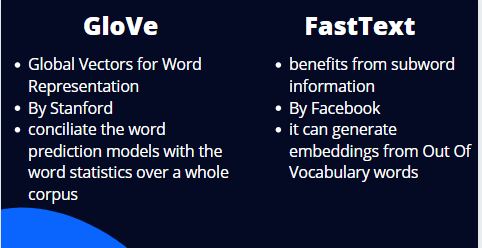

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file='../input/glove-global-vectors-for-word-representation/glove.6B.50d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove_loaded=glove2word2vec(glove_file, word2vec_output_file)
print(glove_loaded)

In [ ]:
glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)
plt.plot(glove_model['edits'])
plt.plot(glove_model['suggestion'])
plt.show()

In [ ]:
# PCA transform in 2D for visualization of glove embedded words
from matplotlib import pyplot
pca = PCA(n_components=2)
transformation_model=glove_model[glove_model.wv.vocab]
result = pca.fit_transform(transformation_model[:50])
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(glove_model.wv.vocab)
for i, word in enumerate(words[:50]):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()